In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

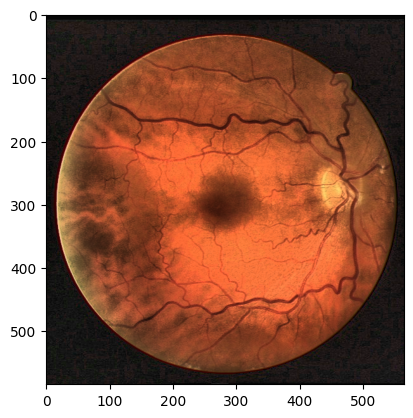

In [ ]:
# for single image CLAHE....

img=cv2.imread('/content/drive/MyDrive/DRIVE/training_image/22_training.jpg')
hsv_img=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
h, s, v=hsv_img[:,:,0], hsv_img[:,:,1], hsv_img[:,:,2]
clahe=cv2.createCLAHE(clipLimit=5.0,tileGridSize=(8,8))
v=clahe.apply(v)

hsv_img=np.dstack((h,s,v))

rgb=cv2.cvtColor(hsv_img, cv2.COLOR_HSV2BGR)
output_path = '/content/drive/MyDrive/DRIVE/image.jpg'
cv2.imwrite(output_path, rgb)

plt.imshow(rgb)

## **For multiple image CLAHE**

In [ ]:
import os
from PIL import Image

def gamma_correction(image, gamma):
    # Normalize pixel values to the range [0, 1]
    image = image / 255.0

    # Apply gamma correction
    corrected_image = np.power(image, gamma)

    # Denormalize back to the range [0, 255]
    corrected_image = (corrected_image * 255).astype(np.uint8)

    return corrected_image

original_folder1 ='/content/drive/MyDrive/DRIVE/training_image'
original_folder ='/content/drive/MyDrive/DRIVE/test_image'
resized_folder1='/content/preprocessed_clahe'
resized_folder='/content/preprocessed_gamma_corrected'

for i in range(20):
  filename1 = os.listdir(original_folder)[i]
  img_path = original_folder+'/'+filename1
  img=cv2.imread(img_path)
  hsv_img=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  h, s, v = hsv_img[:,:,0], hsv_img[:,:,1], hsv_img[:,:,2]
  clahe=cv2.createCLAHE(clipLimit=5.0,tileGridSize=(8,8))
  v=clahe.apply(v)
  hsv_img=np.dstack((h,s,v))
  rgb=cv2.cvtColor(hsv_img, cv2.COLOR_HSV2BGR)
  gamma_value = 0.85
  gray_img = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)

  # Normalize the pixel values to the range [0, 1]
  normalized_img = gray_img.astype(np.float32) / 255.0
  newimgpath=resized_folder1+'/clahe'+filename1
  image = Image.fromarray((normalized_img * 255).astype(np.uint8))
  image.save(newimgpath)
  print(newimgpath)

  # Perform gamma correction
  input_image = cv2.imread(newimgpath)
  corrected_image = gamma_correction(input_image, gamma_value)
  newimgpath=resized_folder+'/preprocessed'+filename1
  image = Image.fromarray(corrected_image)
  image.save(newimgpath)


/content/preprocessed_clahe/clahe05_test.jpg
/content/preprocessed_clahe/clahe03_test.jpg
/content/preprocessed_clahe/clahe10_test.jpg
/content/preprocessed_clahe/clahe11_test.jpg
/content/preprocessed_clahe/clahe09_test.jpg
/content/preprocessed_clahe/clahe04_test.jpg
/content/preprocessed_clahe/clahe06_test.jpg
/content/preprocessed_clahe/clahe08_test.jpg
/content/preprocessed_clahe/clahe07_test.jpg
/content/preprocessed_clahe/clahe01_test.jpg
/content/preprocessed_clahe/clahe02_test.jpg
/content/preprocessed_clahe/clahe16_test.jpg
/content/preprocessed_clahe/clahe19_test.jpg
/content/preprocessed_clahe/clahe12_test.jpg
/content/preprocessed_clahe/clahe18_test.jpg
/content/preprocessed_clahe/clahe20_test.jpg
/content/preprocessed_clahe/clahe13_test.jpg
/content/preprocessed_clahe/clahe17_test.jpg
/content/preprocessed_clahe/clahe15_test.jpg
/content/preprocessed_clahe/clahe14_test.jpg


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


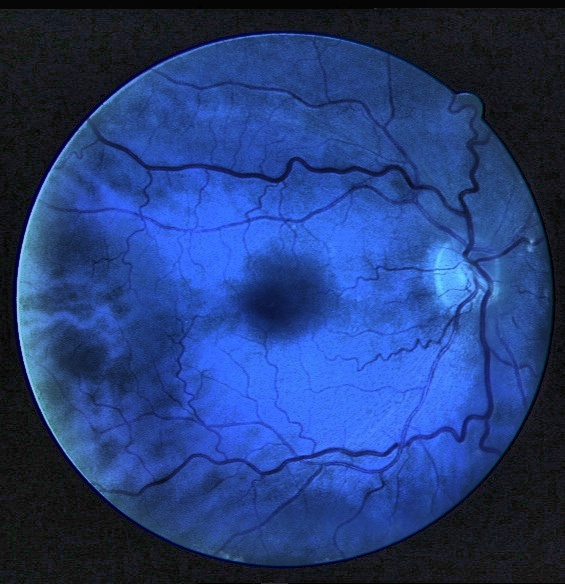

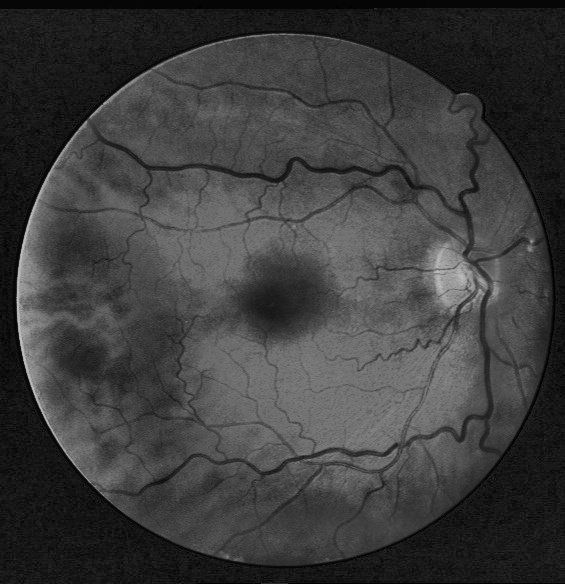

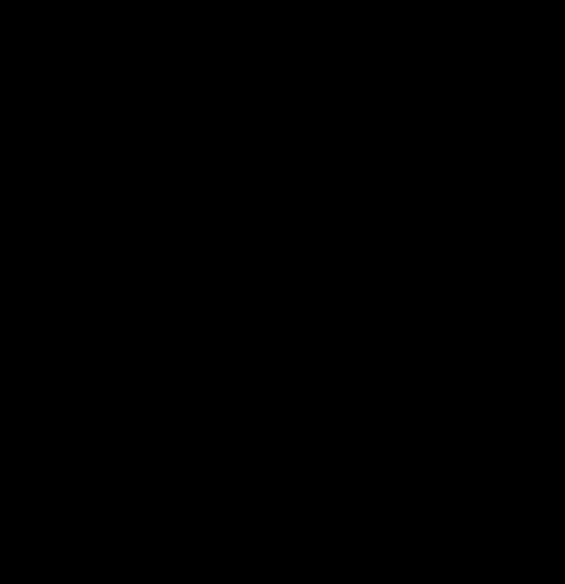

Normalized grayscale image saved to: /content/normalized_grayscale_image.jpg


In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np

# Load a color image
color_img = cv2.imread('/content/drive/MyDrive/DRIVE/image.jpg')

# Convert the color image to grayscale
gray_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)

# Normalize the pixel values to the range [0, 1]
normalized_img = gray_img.astype(np.float32) / 255.0

# Display the original color and grayscale images (optional)
cv2_imshow(color_img)
cv2_imshow(gray_img)
cv2_imshow(normalized_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Save the grayscale image as a new file (optional)
output_path = '/content/normalized_grayscale_image.jpg'
output_path1 = '/content/drive/MyDrive/DRIVE/grayscale_image.jpg'
cv2.imwrite(output_path, (normalized_img * 255).astype(np.uint8))
cv2.imwrite(output_path1,gray_img )
print(f"Normalized grayscale image saved to: {output_path}")


# **Preprocessing**

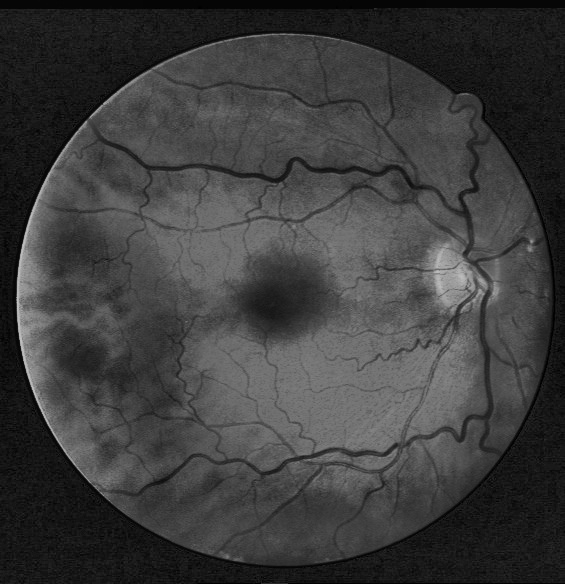

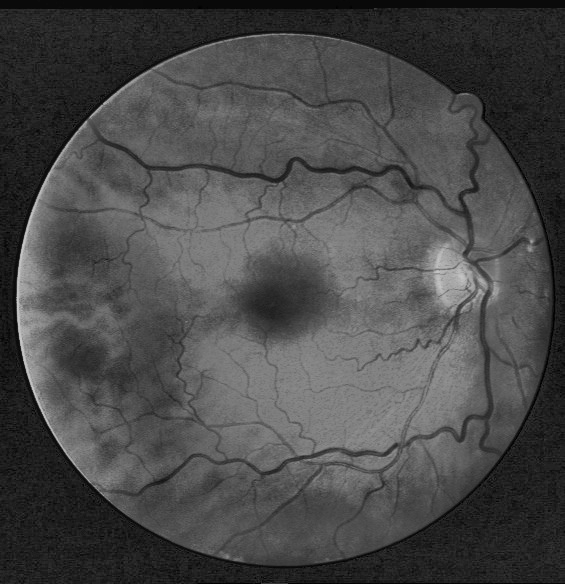

True

In [ ]:
def gamma_correction(image, gamma):
    # Normalize pixel values to the range [0, 1]
    image = image / 255.0

    # Apply gamma correction
    corrected_image = np.power(image, gamma)

    # Denormalize back to the range [0, 255]
    corrected_image = (corrected_image * 255).astype(np.uint8)

    return corrected_image

# Load an image
input_image = cv2.imread('/content/normalized_grayscale_image.jpg')

# Set the gamma value (adjust as needed)
gamma_value = 0.85

# Perform gamma correction
corrected_image = gamma_correction(input_image, gamma_value)

# Display the original and corrected images
cv2_imshow( input_image)
cv2_imshow(corrected_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


output_path = '/content/preprocessed_image.jpg'
cv2.imwrite(output_path, corrected_image)

## **DATA** **PREPROCESSING**

In [ ]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import os
from PIL import Image
import matplotlib.image as mpimg
import cv2
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import keras
from tqdm import tqdm
from glob import glob

In [ ]:
from google.colab.patches import cv2_imshow
names=os.listdir("/content/drive/MyDrive/DRIVE (1)/both_masks")
path="/content/drive/MyDrive/DRIVE (1)/both_masks_png"
for i in names:
    name=i.split('.')[0]
    img=Image.open(f"/content/drive/MyDrive/DRIVE (1)/both_masks/{i}")
    print(f"/content/drive/MyDrive/DRIVE (1)/both_masks/{i}")
    # cv2_imshow(img)
    # p=os.path.join(path,name+'.png')
    img.save(path+'/'+name+'.png')


/content/drive/MyDrive/DRIVE (1)/both_masks/Copy of 32_manual1 (1).gif
/content/drive/MyDrive/DRIVE (1)/both_masks/Copy of 37_manual1 (1).gif
/content/drive/MyDrive/DRIVE (1)/both_masks/Copy of 38_manual1 (1).gif
/content/drive/MyDrive/DRIVE (1)/both_masks/Copy of 34_manual1 (1).gif
/content/drive/MyDrive/DRIVE (1)/both_masks/Copy of 36_manual1 (1).gif
/content/drive/MyDrive/DRIVE (1)/both_masks/Copy of 39_manual1 (1).gif
/content/drive/MyDrive/DRIVE (1)/both_masks/Copy of 33_manual1 (1).gif
/content/drive/MyDrive/DRIVE (1)/both_masks/Copy of 40_manual1 (1).gif
/content/drive/MyDrive/DRIVE (1)/both_masks/Copy of 35_manual1 (1).gif
/content/drive/MyDrive/DRIVE (1)/both_masks/Copy of 22_manual1 (1).gif
/content/drive/MyDrive/DRIVE (1)/both_masks/Copy of 26_manual1 (1).gif
/content/drive/MyDrive/DRIVE (1)/both_masks/Copy of 21_manual1 (1).gif
/content/drive/MyDrive/DRIVE (1)/both_masks/Copy of 23_manual1 (1).gif
/content/drive/MyDrive/DRIVE (1)/both_masks/Copy of 25_manual1 (1).gif
/conte

In [ ]:
images=[]
names=os.listdir("/content/drive/MyDrive/DRIVE (1)/both_masks_png")
path="/content/drive/MyDrive/DRIVE (1)/both_masks_png"
path_save="/content/drive/MyDrive/DRIVE (1)/preproc-masks"
for i in names:
    newpath=os.path.join(path,i)
    img=cv2.imread(newpath)
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img=cv2.resize(img,(256,256))
    img=cv2.addWeighted(img,4, cv2.GaussianBlur( img, (0,0) , 5) ,-4 ,128)
    # img=img/255
    savePath=os.path.join(path_save,i)
    cv2.imwrite(savePath, img)

In [ ]:
img=cv2.imread("/content/drive/MyDrive/DRIVE/augmented-colored/images/Copy of 01_test01.png")
img.shape

AttributeError: ignored

In [ ]:
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result


path_save = "/content/drive/MyDrive/DRIVE (1)/both_masks_png"
newpath = "/content/drive/MyDrive/DRIVE (1)/augmented-gray/masks"
filename = os.listdir(path_save)

for i in tqdm(filename):
  path = path_save+'/'+i
  name = i.split('.')[0]
  img = Image.open(path)
  imgpath = newpath+'/'+name

  #original
  img.save(newpath+'/'+name+'01.png')

  #vertical
  vertical = img.transpose(method=Image.FLIP_TOP_BOTTOM)
  vertical.save(imgpath+'02.png')

  #horizontal
  horizontal = img.transpose(method=Image.FLIP_LEFT_RIGHT)
  horizontal.save(imgpath+'03.png')

  #horizontal and vertical
  verhor = img.transpose(method=Image.FLIP_TOP_BOTTOM)
  verhor = verhor.transpose(method=Image.FLIP_LEFT_RIGHT)
  verhor.save(imgpath+'04.png')

  img = cv2.imread(path)

  #30 deg
  rotimg = rotate_image(img,-30)
  rotpath = imgpath+'05.png'
  cv2.imwrite(rotpath, rotimg)

  #60 deg
  rotimg = rotate_image(img,-60)
  rotpath = imgpath+'06.png'
  cv2.imwrite(rotpath, rotimg)

  #120 deg
  rotimg = rotate_image(img,-120)
  rotpath = imgpath+'07.png'
  cv2.imwrite(rotpath, rotimg)

  #150 deg
  rotimg = rotate_image(img,-150)
  rotpath = imgpath+'08.png'
  cv2.imwrite(rotpath, rotimg)

100%|██████████| 40/40 [00:07<00:00,  5.27it/s]


In [ ]:
print(len(os.listdir("/content/drive/MyDrive/DRIVE (1)/augmented-gray/images")))

320


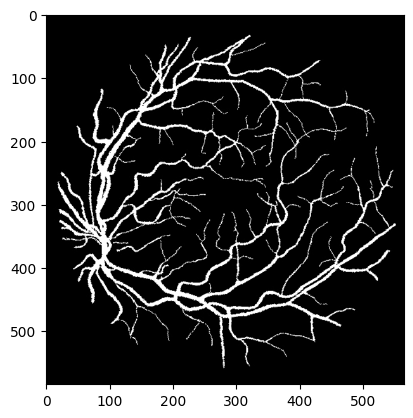

In [ ]:
from PIL import Image

img = Image.open("/content/drive/MyDrive/DRIVE/training/images-preprocessed/01_test.tif")
img = img.rotate(30)
plt.imshow(img,cmap='gray')

img1 = Image.open("/content/drive/MyDrive/DRIVE/training/both_masks/Copy of 01_manual1.jpg")
img1 = img1.rotate(30)
plt.imshow(img1,cmap='gray')

In [ ]:
import numpy as np

# Assign array
arr = np.array([1, 2, 3, 4, 5, 6])
arr1 = np.array([1, 2, 3, 4, 5, 6])


# Display original array
print("Original array: ", arr)

# Shuffle array
np.random.shuffle(arr,arr1)
print(arr)
print(arr1)


Original array:  [1 2 3 4 5 6]


TypeError: ignored

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.metrics import cohen_kappa_score
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.densenet import DenseNet121
import keras
import cv2
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import cv2
import os
from keras.callbacks import Callback
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.utils import class_weight

In [ ]:
!pip install -q kaggle


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle competitions download -c aptos2019-blindness-detection

100% 9.51G/9.51G [01:57<00:00, 101MB/s]
100% 9.51G/9.51G [01:57<00:00, 87.2MB/s]


In [ ]:
!unzip aptos2019-blindness-detection.zip

In [ ]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import os
from PIL import Image
import matplotlib.image as mpimg
import cv2
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import keras
from tqdm import tqdm
from glob import glob

In [ ]:
def gamma_correction(image, gamma):
    # Normalize pixel values to the range [0, 1]
    image = image / 255.0

    # Apply gamma correction
    corrected_image = np.power(image, gamma)

    # Denormalize back to the range [0, 255]
    corrected_image = (corrected_image * 255).astype(np.uint8)

    return corrected_image

In [ ]:
original_folder ='train_images'
resized_folder='train_gamma'

for i in tqdm(range(3662)):
  filename1 = os.listdir(original_folder)[i]
  img_path = original_folder+'/'+filename1
  img=cv2.imread(img_path)

  gamma_value = 1.25

  # Perform gamma correction
  new = gamma_correction(img, gamma_value)
  new=cv2.addWeighted(new,4, cv2.GaussianBlur(new, (0,0) , 55) ,-4 ,128)
  new = Image.fromarray(new)
  new.save(f'train_gamma/{filename1}')

  7%|▋         | 243/3662 [22:46<5:20:33,  5.63s/it]


KeyboardInterrupt: ignored

# **Green channel extraction**

In [ ]:
import os
from PIL import Image
import cv2
from matplotlib import pyplot as plt


original_folder1 ='/content/drive/MyDrive/train_aug/images'
original_folder ='/content/drive/MyDrive/test_aug/images'
resized_folder='/content/prep_clahe'


for i in range(160):
  filename1 = os.listdir(original_folder1)[i]
  img_path = original_folder1+'/'+filename1
  img=cv2.imread(img_path)
  b, g, r = cv2.split(img)
  green_channel = g
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
  clahe_result = clahe.apply(green_channel)
  newimgpath=resized_folder+'/clahe'+filename1
  image = Image.fromarray(clahe_result)
  image.save(newimgpath)
'''

# Read the retinal fundus image
image = cv2.imread('/content/drive/MyDrive/DRIVE/training_image/22_training.jpg')

# Extract the green channel
b, g, r = cv2.split(image)
green_channel = g  # Take only the green channel

# Apply Contrast-Limited Adaptive Histogram Equalization (CLAHE) to the green channel
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_result = clahe.apply(green_channel)

# Display the original, green channel, and preprocessed images
plt.subplot(1, 3, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(1, 3, 2), plt.imshow(green_channel, cmap='gray'), plt.title('Green Channel')
plt.subplot(1, 3, 3), plt.imshow(clahe_result, cmap='gray'), plt.title('CLAHE Preprocessed')
plt.show()
'''



"\n\n# Read the retinal fundus image\nimage = cv2.imread('/content/drive/MyDrive/DRIVE/training_image/22_training.jpg')\n\n# Extract the green channel\nb, g, r = cv2.split(image)\ngreen_channel = g  # Take only the green channel\n\n# Apply Contrast-Limited Adaptive Histogram Equalization (CLAHE) to the green channel\nclahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))\nclahe_result = clahe.apply(green_channel)\n\n# Display the original, green channel, and preprocessed images\nplt.subplot(1, 3, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')\nplt.subplot(1, 3, 2), plt.imshow(green_channel, cmap='gray'), plt.title('Green Channel')\nplt.subplot(1, 3, 3), plt.imshow(clahe_result, cmap='gray'), plt.title('CLAHE Preprocessed')\nplt.show()\n"

In [ ]:
import cv2
img=cv2.imread("/content/drive/MyDrive/DRIVE/image.jpg")
img.resize(512,512)
img.shape

(512, 512)